## Importing required libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## Data Preparation

In [2]:
# importing the data file
data = pd.read_excel("employee attrition final dataset.xlsx")

In [3]:
# printing the top 10 rows of data
data.head(10)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
6,EID_18588,F,21.0,4,Married,Springfield,Purchasing,Directive,2.0,1,...,type2,2.0,3,-0.9612,0.7075,2.0,3,7,3,0.2819
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,...,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,...,type0,4.0,1,NaN,1.8688,2.0,5,6,3,0.1968
9,EID_21262,M,45.0,3,Married,Lebanon,IT,Directive,21.0,4,...,type3,4.0,3,0.7516,-0.4537,2.0,4,8,3,0.2870


## Exploratory Data Analysis

In [4]:
# column name
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [5]:
# understanding the data structure
data.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,4713.000000,4999.000000,4903.000000,4999.000000,4999.000000,4999.000000,4999.000000,4992.000000,4989.000000,4999.000000,4595.000000,4999.000000,4524.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,39.632930,3.169834,13.378748,2.356071,46.964593,0.815163,2.799560,6.005208,2.382241,3.104221,-0.007690,-0.021416,1.891247,2.844569,7.086617,3.247650,0.187242
std,13.715201,1.074162,10.363130,1.150377,15.844159,0.648699,1.164119,2.050351,1.126703,0.835476,0.990397,0.997814,0.532078,0.939148,1.172540,0.925324,0.182154
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070850
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142500
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,4.000000,8.000000,3.000000,4.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.234600
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                4999 non-null   object 
 1   Gender                     4999 non-null   object 
 2   Age                        4713 non-null   float64
 3   Education_Level            4999 non-null   int64  
 4   Relationship_Status        4999 non-null   object 
 5   Hometown                   4999 non-null   object 
 6   Unit                       4999 non-null   object 
 7   Decision_skill_possess     4999 non-null   object 
 8   Time_of_service            4903 non-null   float64
 9   Time_since_promotion       4999 non-null   int64  
 10  growth_rate                4999 non-null   int64  
 11  Travel_Rate                4999 non-null   int64  
 12  Post_Level                 4999 non-null   int64  
 13  Pay_Scale                  4992 non-null   float

In [7]:
# checking if data has null values
data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          286
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               96
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      7
Compensation_and_Benefits      0
Work_Life_balance             10
VAR1                           0
VAR2                         404
VAR3                           0
VAR4                         475
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [8]:
data['Work_Life_balance'] = data['Work_Life_balance'].fillna(1.0)
data = data.fillna(0)

In [9]:
data['Attrition_rate'] = np.round(data['Attrition_rate'],0)

In [10]:
# Checking valvue count for class balance
data['Attrition_rate'].value_counts()

0.0    4611
1.0     388
Name: Attrition_rate, dtype: int64

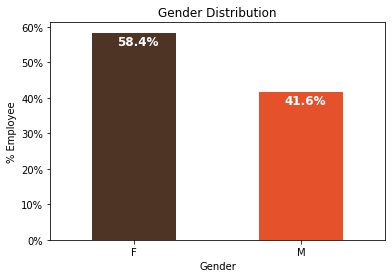

In [11]:
# To see attrition percentage by gender
ax = (data['Gender'].value_counts()*100.0 /len(data)).plot(kind='bar',stacked = True, rot = 0,color = ['#4D3425','#E4512B'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Employee')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

In [12]:
data['Work_Life_balance'].value_counts()

1.0    1492
3.0    1424
2.0    1138
4.0     870
5.0      75
Name: Work_Life_balance, dtype: int64

Text(0.5, 1.0, '% of Employees')

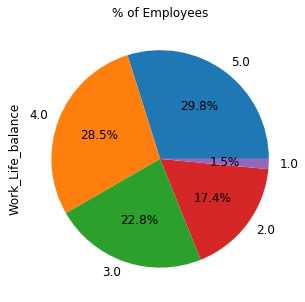

In [13]:
# To see attrition percentage by Work_Life_balance
ax = (data['Work_Life_balance'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = [5.0,4.0,3.0,2.0,1.0],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Work_Life_balance',fontsize = 12)
ax.set_title('% of Employees', fontsize = 12)

#  Department Data

In [14]:
data.Unit.value_counts()

IT                           1008
Logistics                     841
Sales                         675
Operarions                    482
R&D                           480
Accounting and Finance        362
Purchasing                    358
Human Resource Management     245
Marketing                     157
Production                    151
Quality                       139
Security                      101
Name: Unit, dtype: int64

In [15]:
dataIT = data[data.Unit == "IT"].drop('Unit', axis=1)
dataIT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 4998
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                1008 non-null   object 
 1   Gender                     1008 non-null   object 
 2   Age                        1008 non-null   float64
 3   Education_Level            1008 non-null   int64  
 4   Relationship_Status        1008 non-null   object 
 5   Hometown                   1008 non-null   object 
 6   Decision_skill_possess     1008 non-null   object 
 7   Time_of_service            1008 non-null   float64
 8   Time_since_promotion       1008 non-null   int64  
 9   growth_rate                1008 non-null   int64  
 10  Travel_Rate                1008 non-null   int64  
 11  Post_Level                 1008 non-null   int64  
 12  Pay_Scale                  1008 non-null   float64
 13  Compensation_and_Benefits  1008 non-null   objec

In [16]:
dataLogistics = data[data.Unit == "Logistics"].drop('Unit', axis=1)
dataLogistics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 1 to 4989
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                841 non-null    object 
 1   Gender                     841 non-null    object 
 2   Age                        841 non-null    float64
 3   Education_Level            841 non-null    int64  
 4   Relationship_Status        841 non-null    object 
 5   Hometown                   841 non-null    object 
 6   Decision_skill_possess     841 non-null    object 
 7   Time_of_service            841 non-null    float64
 8   Time_since_promotion       841 non-null    int64  
 9   growth_rate                841 non-null    int64  
 10  Travel_Rate                841 non-null    int64  
 11  Post_Level                 841 non-null    int64  
 12  Pay_Scale                  841 non-null    float64
 13  Compensation_and_Benefits  841 non-null    object

In [17]:
dataQuality = data[data.Unit == "Quality"].drop('Unit', axis=1)
dataQuality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 2 to 4975
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                139 non-null    object 
 1   Gender                     139 non-null    object 
 2   Age                        139 non-null    float64
 3   Education_Level            139 non-null    int64  
 4   Relationship_Status        139 non-null    object 
 5   Hometown                   139 non-null    object 
 6   Decision_skill_possess     139 non-null    object 
 7   Time_of_service            139 non-null    float64
 8   Time_since_promotion       139 non-null    int64  
 9   growth_rate                139 non-null    int64  
 10  Travel_Rate                139 non-null    int64  
 11  Post_Level                 139 non-null    int64  
 12  Pay_Scale                  139 non-null    float64
 13  Compensation_and_Benefits  139 non-null    object

In [18]:
dataHR = data[data.Unit == "Human Resource Management"].drop('Unit', axis=1)
dataHR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 3 to 4985
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                245 non-null    object 
 1   Gender                     245 non-null    object 
 2   Age                        245 non-null    float64
 3   Education_Level            245 non-null    int64  
 4   Relationship_Status        245 non-null    object 
 5   Hometown                   245 non-null    object 
 6   Decision_skill_possess     245 non-null    object 
 7   Time_of_service            245 non-null    float64
 8   Time_since_promotion       245 non-null    int64  
 9   growth_rate                245 non-null    int64  
 10  Travel_Rate                245 non-null    int64  
 11  Post_Level                 245 non-null    int64  
 12  Pay_Scale                  245 non-null    float64
 13  Compensation_and_Benefits  245 non-null    object

In [19]:
dataPurchasing = data[data.Unit == "Purchasing"].drop('Unit', axis=1)
dataPurchasing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 5 to 4995
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                358 non-null    object 
 1   Gender                     358 non-null    object 
 2   Age                        358 non-null    float64
 3   Education_Level            358 non-null    int64  
 4   Relationship_Status        358 non-null    object 
 5   Hometown                   358 non-null    object 
 6   Decision_skill_possess     358 non-null    object 
 7   Time_of_service            358 non-null    float64
 8   Time_since_promotion       358 non-null    int64  
 9   growth_rate                358 non-null    int64  
 10  Travel_Rate                358 non-null    int64  
 11  Post_Level                 358 non-null    int64  
 12  Pay_Scale                  358 non-null    float64
 13  Compensation_and_Benefits  358 non-null    object

In [20]:
dataSales = data[data.Unit == "Sales"].drop('Unit', axis=1)
dataSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 7 to 4996
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                675 non-null    object 
 1   Gender                     675 non-null    object 
 2   Age                        675 non-null    float64
 3   Education_Level            675 non-null    int64  
 4   Relationship_Status        675 non-null    object 
 5   Hometown                   675 non-null    object 
 6   Decision_skill_possess     675 non-null    object 
 7   Time_of_service            675 non-null    float64
 8   Time_since_promotion       675 non-null    int64  
 9   growth_rate                675 non-null    int64  
 10  Travel_Rate                675 non-null    int64  
 11  Post_Level                 675 non-null    int64  
 12  Pay_Scale                  675 non-null    float64
 13  Compensation_and_Benefits  675 non-null    object

In [21]:
dataProduction = data[data.Unit == "Production"].drop('Unit', axis=1)
dataProduction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 8 to 4971
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                151 non-null    object 
 1   Gender                     151 non-null    object 
 2   Age                        151 non-null    float64
 3   Education_Level            151 non-null    int64  
 4   Relationship_Status        151 non-null    object 
 5   Hometown                   151 non-null    object 
 6   Decision_skill_possess     151 non-null    object 
 7   Time_of_service            151 non-null    float64
 8   Time_since_promotion       151 non-null    int64  
 9   growth_rate                151 non-null    int64  
 10  Travel_Rate                151 non-null    int64  
 11  Post_Level                 151 non-null    int64  
 12  Pay_Scale                  151 non-null    float64
 13  Compensation_and_Benefits  151 non-null    object

In [22]:
dataOperarions = data[data.Unit == "Operarions"].drop('Unit', axis=1)
dataOperarions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 11 to 4986
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                482 non-null    object 
 1   Gender                     482 non-null    object 
 2   Age                        482 non-null    float64
 3   Education_Level            482 non-null    int64  
 4   Relationship_Status        482 non-null    object 
 5   Hometown                   482 non-null    object 
 6   Decision_skill_possess     482 non-null    object 
 7   Time_of_service            482 non-null    float64
 8   Time_since_promotion       482 non-null    int64  
 9   growth_rate                482 non-null    int64  
 10  Travel_Rate                482 non-null    int64  
 11  Post_Level                 482 non-null    int64  
 12  Pay_Scale                  482 non-null    float64
 13  Compensation_and_Benefits  482 non-null    objec

In [23]:
dataAcconting = data[data.Unit == "Accounting and Finance"].drop('Unit', axis=1)
dataAcconting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 17 to 4997
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                362 non-null    object 
 1   Gender                     362 non-null    object 
 2   Age                        362 non-null    float64
 3   Education_Level            362 non-null    int64  
 4   Relationship_Status        362 non-null    object 
 5   Hometown                   362 non-null    object 
 6   Decision_skill_possess     362 non-null    object 
 7   Time_of_service            362 non-null    float64
 8   Time_since_promotion       362 non-null    int64  
 9   growth_rate                362 non-null    int64  
 10  Travel_Rate                362 non-null    int64  
 11  Post_Level                 362 non-null    int64  
 12  Pay_Scale                  362 non-null    float64
 13  Compensation_and_Benefits  362 non-null    objec

In [24]:
dataMarketing = data[data.Unit == "Marketing"].drop('Unit', axis=1)
dataMarketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 25 to 4958
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                157 non-null    object 
 1   Gender                     157 non-null    object 
 2   Age                        157 non-null    float64
 3   Education_Level            157 non-null    int64  
 4   Relationship_Status        157 non-null    object 
 5   Hometown                   157 non-null    object 
 6   Decision_skill_possess     157 non-null    object 
 7   Time_of_service            157 non-null    float64
 8   Time_since_promotion       157 non-null    int64  
 9   growth_rate                157 non-null    int64  
 10  Travel_Rate                157 non-null    int64  
 11  Post_Level                 157 non-null    int64  
 12  Pay_Scale                  157 non-null    float64
 13  Compensation_and_Benefits  157 non-null    objec

In [25]:
dataRnD = data[data.Unit == "R&D"].drop('Unit', axis=1)
dataRnD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 26 to 4992
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                480 non-null    object 
 1   Gender                     480 non-null    object 
 2   Age                        480 non-null    float64
 3   Education_Level            480 non-null    int64  
 4   Relationship_Status        480 non-null    object 
 5   Hometown                   480 non-null    object 
 6   Decision_skill_possess     480 non-null    object 
 7   Time_of_service            480 non-null    float64
 8   Time_since_promotion       480 non-null    int64  
 9   growth_rate                480 non-null    int64  
 10  Travel_Rate                480 non-null    int64  
 11  Post_Level                 480 non-null    int64  
 12  Pay_Scale                  480 non-null    float64
 13  Compensation_and_Benefits  480 non-null    objec

In [26]:
dataSecurity = data[data.Unit == "Security"].drop('Unit', axis=1)
dataSecurity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 61 to 4932
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                101 non-null    object 
 1   Gender                     101 non-null    object 
 2   Age                        101 non-null    float64
 3   Education_Level            101 non-null    int64  
 4   Relationship_Status        101 non-null    object 
 5   Hometown                   101 non-null    object 
 6   Decision_skill_possess     101 non-null    object 
 7   Time_of_service            101 non-null    float64
 8   Time_since_promotion       101 non-null    int64  
 9   growth_rate                101 non-null    int64  
 10  Travel_Rate                101 non-null    int64  
 11  Post_Level                 101 non-null    int64  
 12  Pay_Scale                  101 non-null    float64
 13  Compensation_and_Benefits  101 non-null    objec

# Label Encoding

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                4999 non-null   object 
 1   Gender                     4999 non-null   object 
 2   Age                        4999 non-null   float64
 3   Education_Level            4999 non-null   int64  
 4   Relationship_Status        4999 non-null   object 
 5   Hometown                   4999 non-null   object 
 6   Unit                       4999 non-null   object 
 7   Decision_skill_possess     4999 non-null   object 
 8   Time_of_service            4999 non-null   float64
 9   Time_since_promotion       4999 non-null   int64  
 10  growth_rate                4999 non-null   int64  
 11  Travel_Rate                4999 non-null   int64  
 12  Post_Level                 4999 non-null   int64  
 13  Pay_Scale                  4999 non-null   float

In [28]:
data = pd.get_dummies(data) 
dataIT = pd.get_dummies(dataIT) 
dataLogistics = pd.get_dummies(dataLogistics) 
dataQuality = pd.get_dummies(dataQuality) 
dataHR = pd.get_dummies(dataHR) 
dataPurchasing = pd.get_dummies(dataPurchasing) 
dataSales = pd.get_dummies(dataSales) 
dataProduction = pd.get_dummies(dataProduction) 
dataOperarions = pd.get_dummies(dataOperarions) 
dataAcconting = pd.get_dummies(dataAcconting) 
dataMarketing = pd.get_dummies(dataMarketing) 
dataRnD = pd.get_dummies(dataRnD) 
dataSecurity = pd.get_dummies(dataSecurity)  

# Class Balancing

In [29]:
def class_balancing(data):
    count_class_0, count_class_1 = data.Attrition_rate.value_counts()

    # Divide by class
    df_class_0 = data[data['Attrition_rate'] == 0]
    df_class_1 = data[data['Attrition_rate'] == 1]
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

    print('Random over-sampling:')
    print(df_test_over.Attrition_rate.value_counts())

    df_test_over.Attrition_rate.value_counts().plot(kind='bar', title='Count (target)')
    return df_test_over

Random over-sampling:
0.0    4611
1.0    4611
Name: Attrition_rate, dtype: int64


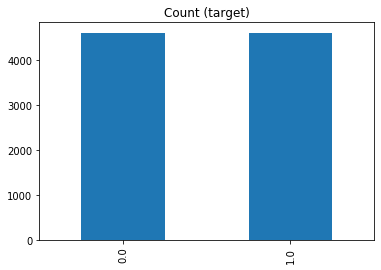

In [30]:
data = class_balancing(data)

Random over-sampling:
0.0    946
1.0    946
Name: Attrition_rate, dtype: int64


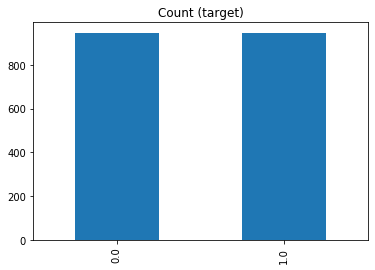

In [31]:
dataIT = class_balancing(dataIT)

Random over-sampling:
0.0    778
1.0    778
Name: Attrition_rate, dtype: int64


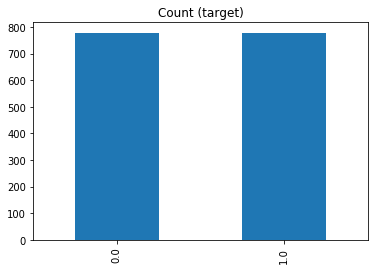

In [32]:
dataLogistics = class_balancing(dataLogistics)

Random over-sampling:
0.0    129
1.0    129
Name: Attrition_rate, dtype: int64


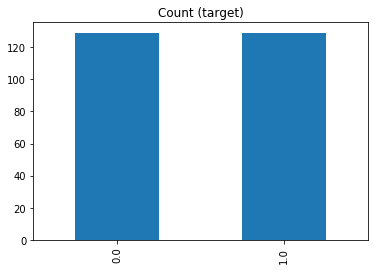

In [33]:
dataQuality = class_balancing(dataQuality)

Random over-sampling:
0.0    229
1.0    229
Name: Attrition_rate, dtype: int64


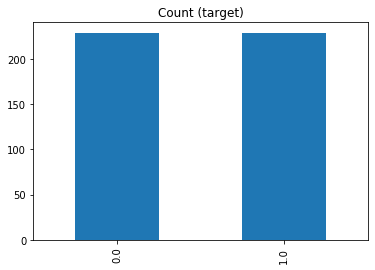

In [34]:
dataHR = class_balancing(dataHR)

Random over-sampling:
0.0    329
1.0    329
Name: Attrition_rate, dtype: int64


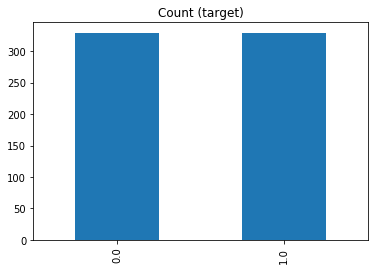

In [35]:
dataPurchasing = class_balancing(dataPurchasing)

Random over-sampling:
0.0    618
1.0    618
Name: Attrition_rate, dtype: int64


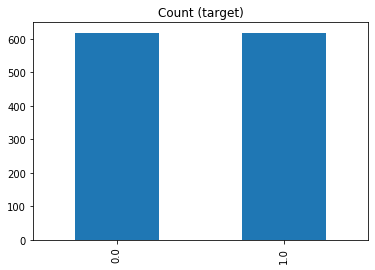

In [36]:
dataSales = class_balancing(dataSales)

Random over-sampling:
0.0    138
1.0    138
Name: Attrition_rate, dtype: int64


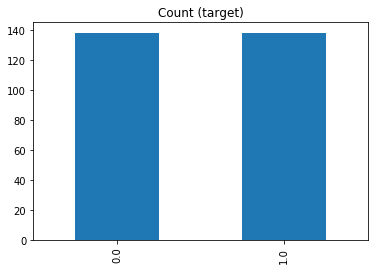

In [37]:
dataProduction = class_balancing(dataProduction)

Random over-sampling:
0.0    438
1.0    438
Name: Attrition_rate, dtype: int64


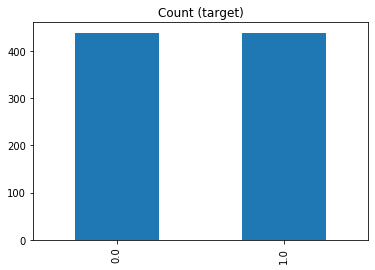

In [38]:
dataOperarions = class_balancing(dataOperarions)

Random over-sampling:
0.0    341
1.0    341
Name: Attrition_rate, dtype: int64


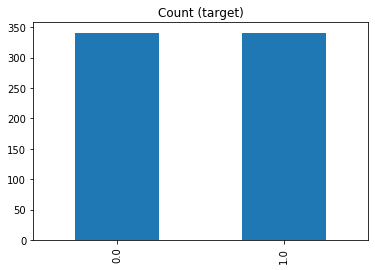

In [39]:
dataAcconting = class_balancing(dataAcconting)

Random over-sampling:
0.0    142
1.0    142
Name: Attrition_rate, dtype: int64


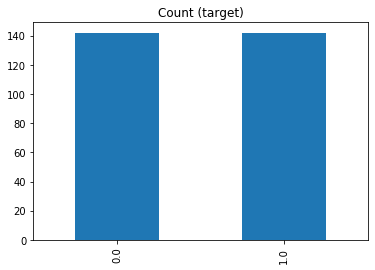

In [40]:
dataMarketing = class_balancing(dataMarketing)

Random over-sampling:
0.0    429
1.0    429
Name: Attrition_rate, dtype: int64


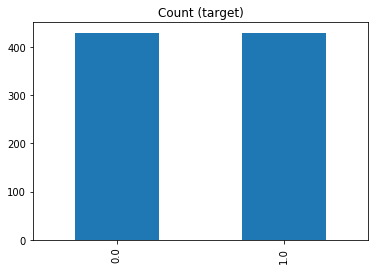

In [41]:
dataRnD = class_balancing(dataRnD)

Random over-sampling:
0.0    94
1.0    94
Name: Attrition_rate, dtype: int64


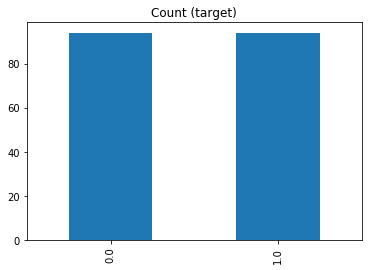

In [42]:
dataSecurity = class_balancing(dataSecurity)

# Feature Selection and Data Preparation

In [43]:
def feature_selection(data):
    x = data.drop('Attrition_rate',axis=1)
    y = data['Attrition_rate']
    # Generating chi score for all features
    chi_scores = chi2(np.abs(x),y)
    # Probality values
    p_values = pd.Series(chi_scores[1],index = x.columns)
    p_values.sort_values(ascending = False , inplace = True)
    print(p_values)
    x = SelectKBest(chi2, k=20).fit_transform(np.abs(x), y)
    return x,y

In [44]:
x, y = feature_selection(data)
XTrain, XTest, YTrain, YTest = train_test_split(x,y, test_size=0.2)
XTrain.shape, XTest.shape, YTrain.shape, YTest.shape

Compensation_and_Benefits_type2      8.782351e-01
Decision_skill_possess_Conceptual    8.696895e-01
VAR1                                 7.949371e-01
Unit_Quality                         7.532573e-01
Unit_Security                        7.116726e-01
                                         ...     
Employee_ID_EID_10978                4.592834e-06
Unit_IT                              4.115381e-06
Employee_ID_EID_7146                 2.726505e-06
Compensation_and_Benefits_type0      3.359719e-08
Age                                  2.185039e-12
Length: 5045, dtype: float64


((7377, 20), (1845, 20), (7377,), (1845,))

In [45]:
x, y = feature_selection(dataIT)
XTraindataIT, XTestdataIT, YTraindataIT, YTestdataIT = train_test_split(x,y, test_size=0.2)
XTraindataIT.shape, XTestdataIT.shape, YTraindataIT.shape, YTestdataIT.shape

Hometown_Franklin                  7.680826e-01
Relationship_Status_Married        6.129342e-01
Post_Level                         6.100392e-01
Pay_Scale                          5.796980e-01
VAR5                               4.997942e-01
                                       ...     
Employee_ID_EID_2738               2.726505e-06
Employee_ID_EID_15300              2.726505e-06
Compensation_and_Benefits_type3    1.122713e-09
growth_rate                        1.288580e-24
Age                                2.183443e-30
Length: 1042, dtype: float64


((1513, 20), (379, 20), (1513,), (379,))

In [46]:
x, y = feature_selection(dataLogistics)
XTraindataLogistics, XTestdataLogistics, YTraindataLogistics, YTestdataLogistics = train_test_split(x,y, test_size=0.2)
XTraindataLogistics.shape, XTestdataLogistics.shape, YTraindataLogistics.shape, YTestdataLogistics.shape

Compensation_and_Benefits_type2      9.734530e-01
Hometown_Franklin                    9.171891e-01
VAR4                                 8.458596e-01
Decision_skill_possess_Behavioral    8.369957e-01
growth_rate                          7.751463e-01
                                         ...     
Employee_ID_EID_19564                2.209050e-05
Work_Life_balance                    2.006313e-05
Employee_ID_EID_21072                7.744216e-06
Decision_skill_possess_Directive     1.877765e-06
Time_of_service                      4.381861e-08
Length: 875, dtype: float64


((1244, 20), (312, 20), (1244,), (312,))

In [47]:
x, y = feature_selection(dataQuality)
XTraindataQuality, XTestdataQuality, YTraindataQuality,YTestdataQuality = train_test_split(x,y, test_size=0.2)
XTraindataQuality.shape, XTestdataQuality.shape, YTraindataQuality.shape, YTestdataQuality.shape

VAR2                     8.429088e-01
Pay_Scale                8.213745e-01
Education_Level          7.519777e-01
VAR6                     7.427869e-01
VAR5                     5.774687e-01
                             ...     
Employee_ID_EID_3331     1.075112e-04
Travel_Rate              1.955081e-05
Employee_ID_EID_20117    1.307185e-05
Hometown_Franklin        2.726505e-06
Age                      9.861541e-07
Length: 173, dtype: float64


((206, 20), (52, 20), (206,), (52,))

In [48]:
x, y = feature_selection(dataHR)
XTraindataHR, XTestdataHR, YTraindataHR, YTestdataHR = train_test_split(x,y, test_size=0.2)
XTraindataHR.shape, XTestdataHR.shape, YTraindataHR.shape, YTestdataHR.shape

Compensation_and_Benefits_type2      1.000000e+00
Post_Level                           8.864030e-01
Time_of_service                      8.861931e-01
Hometown_Washington                  8.161534e-01
Decision_skill_possess_Analytical    8.045709e-01
                                         ...     
Hometown_Franklin                    1.416965e-05
Employee_ID_EID_1174                 1.307185e-05
Employee_ID_EID_8226                 7.744216e-06
Employee_ID_EID_6691                 1.620014e-06
Age                                  9.370874e-18
Length: 279, dtype: float64


((366, 20), (92, 20), (366,), (92,))

In [49]:
x, y = feature_selection(dataPurchasing)
XTraindataPurchasing, XTestdataPurchasing, YTraindataPurchasing, YTestdataPurchasing = train_test_split(x,y, test_size=0.2)
XTraindataPurchasing.shape, XTestdataPurchasing.shape, YTraindataPurchasing.shape, YTestdataPurchasing.shape

VAR4                                9.764648e-01
Gender_F                            7.544542e-01
Gender_M                            7.245892e-01
Hometown_Franklin                   6.521086e-01
Compensation_and_Benefits_type0     6.373519e-01
                                        ...     
Employee_ID_EID_10774               3.737982e-05
Employee_ID_EID_13380               4.592834e-06
Decision_skill_possess_Directive    2.143518e-08
Age                                 3.668689e-09
Time_of_service                     1.233285e-41
Length: 392, dtype: float64


((526, 20), (132, 20), (526,), (132,))

In [50]:
x, y = feature_selection(dataSales)
XTraindataSales, XTestdataSales, YTraindataSales, YTestdataSales = train_test_split(x,y, test_size=0.2)
XTraindataSales.shape, XTestdataSales.shape, YTraindataSales.shape, YTestdataSales.shape

Compensation_and_Benefits_type2    9.696104e-01
VAR1                               9.612310e-01
Hometown_Franklin                  9.519149e-01
Hometown_Lebanon                   8.800180e-01
VAR5                               8.009287e-01
                                       ...     
Employee_ID_EID_5033               6.334248e-05
Employee_ID_EID_7146               3.737982e-05
Employee_ID_EID_2434               2.209050e-05
growth_rate                        3.365845e-16
Time_of_service                    2.692500e-16
Length: 709, dtype: float64


((988, 20), (248, 20), (988,), (248,))

In [51]:
x, y = feature_selection(dataProduction)
XTraindataProduction, XTestdataProduction, YTraindataProduction, YTestdataProduction = train_test_split(x,y, test_size=0.2)
XTraindataProduction.shape, XTestdataProduction.shape, YTraindataProduction.shape, YTestdataProduction.shape

Hometown_Washington                1.000000e+00
VAR7                               8.653142e-01
Hometown_Lebanon                   8.330289e-01
Time_of_service                    8.269712e-01
Education_Level                    7.351710e-01
                                       ...     
Employee_ID_EID_10978              1.075112e-04
Employee_ID_EID_13896              6.334248e-05
Compensation_and_Benefits_type3    1.628658e-05
Time_since_promotion               1.683315e-06
Hometown_Franklin                  9.215887e-09
Length: 185, dtype: float64


((220, 20), (56, 20), (220,), (56,))

In [52]:
x, y = feature_selection(dataOperarions)
XTraindataOperarions, XTestdataOperarions, YTraindataOperarions, YTestdataOperarions = train_test_split(x,y, test_size=0.2)
XTraindataOperarions.shape, XTestdataOperarions.shape, YTraindataOperarions.shape, YTestdataOperarions.shape

VAR7                                 9.555356e-01
Decision_skill_possess_Conceptual    8.912543e-01
Education_Level                      8.801685e-01
VAR1                                 8.476680e-01
Time_since_promotion                 5.038242e-01
                                         ...     
Gender_M                             4.530325e-05
Compensation_and_Benefits_type0      2.336033e-05
Gender_F                             2.233998e-05
growth_rate                          1.496701e-05
Time_of_service                      9.497941e-07
Length: 516, dtype: float64


((700, 20), (176, 20), (700,), (176,))

In [53]:
x, y = feature_selection(dataAcconting)
XTraindataAcconting, XTestdataAcconting, YTraindataAcconting, YTestdataAcconting = train_test_split(x,y, test_size=0.2)
XTraindataAcconting.shape, XTestdataAcconting.shape, YTraindataAcconting.shape, YTestdataAcconting.shape

Relationship_Status_Married        7.353909e-01
Compensation_and_Benefits_type4    7.150007e-01
Post_Level                         6.827826e-01
Time_since_promotion               6.647672e-01
Relationship_Status_Single         6.598747e-01
                                       ...     
Hometown_Franklin                  6.738559e-06
Employee_ID_EID_16850              4.592834e-06
Employee_ID_EID_18305              2.726505e-06
Age                                1.663196e-07
Hometown_Washington                9.264885e-09
Length: 396, dtype: float64


((545, 20), (137, 20), (545,), (137,))

In [54]:
x, y = feature_selection(dataMarketing)
XTraindataMarketing, XTestdataMarketing, YTraindataMarketing, YTestdataMarketing = train_test_split(x,y, test_size=0.2)
XTraindataMarketing.shape, XTestdataMarketing.shape, YTraindataMarketing.shape, YTestdataMarketing.shape

VAR2                     0.946289
Pay_Scale                0.922760
VAR5                     0.889310
Hometown_Springfield     0.829248
Post_Level               0.726608
                           ...   
Employee_ID_EID_7811     0.000311
Employee_ID_EID_11191    0.000311
Employee_ID_EID_7940     0.000311
Employee_ID_EID_14773    0.000063
Hometown_Clinton         0.000063
Length: 191, dtype: float64


((227, 20), (57, 20), (227,), (57,))

In [55]:
x, y = feature_selection(dataRnD)
XTraindataRnD, XTestdataRnD, YTraindataRnD, YTestdataRnD = train_test_split(x,y, test_size=0.2)
XTraindataRnD.shape, XTestdataRnD.shape, YTraindataRnD.shape, YTestdataRnD.shape

Decision_skill_possess_Directive    1.000000e+00
Work_Life_balance                   1.000000e+00
VAR3                                9.844124e-01
VAR4                                9.793112e-01
VAR5                                9.356960e-01
                                        ...     
Hometown_Franklin                   1.887297e-04
Employee_ID_EID_23944               3.737982e-05
Compensation_and_Benefits_type3     2.656752e-05
Compensation_and_Benefits_type4     4.302779e-06
growth_rate                         1.071302e-17
Length: 514, dtype: float64


((686, 20), (172, 20), (686,), (172,))

In [56]:
x, y = feature_selection(dataSecurity)
XTraindataSecurity, XTestdataSecurity, YTraindataSecurity, YTestdataSecurity = train_test_split(x,y, test_size=0.2)
XTraindataSecurity.shape, XTestdataSecurity.shape, YTraindataSecurity.shape, YTestdataSecurity.shape

Hometown_Springfield                 8.864030e-01
VAR5                                 8.604904e-01
Decision_skill_possess_Analytical    7.630246e-01
Compensation_and_Benefits_type3      7.179817e-01
Gender_F                             7.172452e-01
                                         ...     
Post_Level                           3.031459e-05
Travel_Rate                          3.414174e-07
Decision_skill_possess_Behavioral    3.414174e-07
growth_rate                          1.409768e-07
Pay_Scale                            9.522231e-12
Length: 134, dtype: float64


((150, 20), (38, 20), (150,), (38,))

In [57]:
orgMetrics = pd.DataFrame()
ITMetrics = pd.DataFrame()
LogisticsMetrics = pd.DataFrame()
QualityMetrics = pd.DataFrame()
HRMetrics = pd.DataFrame()
PurchasingMetrics = pd.DataFrame()
SalesMetrics = pd.DataFrame()
ProductionMetrics = pd.DataFrame()
OperarionsMetrics = pd.DataFrame()
AccontingMetrics = pd.DataFrame()
MarketingMetrics = pd.DataFrame()
RnDMetrics = pd.DataFrame()
SecurityMetrics = pd.DataFrame()

#  Decision Tree

In [58]:
dt_metrics = pd.DataFrame()

def decision_tree(xtrain, xtest, ytrain, ytest):
    dt = DecisionTreeClassifier()
    dt.fit(xtrain, ytrain)
    pred =  dt.predict(xtest)
    acc = accuracy_score(ytest, pred)
    f1 = f1_score(ytest, pred)
    return acc, f1

In [59]:
acc, f1 = decision_tree(XTrain, XTest, YTrain, YTest)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
dt_metrics = dt_metrics.append([['Organisation', acc*100, f1*100]]) 
orgMetrics = orgMetrics.append([['Decision Tree', acc*100, f1*100]]) 

Accuracy Score :  64.17
F1-Score :  63.62


In [60]:
acc, f1 = decision_tree(XTraindataIT, XTestdataIT, YTraindataIT, YTestdataIT)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
dt_metrics = dt_metrics.append([['IT', acc*100, f1*100]]) 
ITMetrics = ITMetrics.append([['Decision Tree', acc*100, f1*100]]) 

Accuracy Score :  96.83
F1-Score :  96.94


In [61]:
acc, f1 = decision_tree(XTraindataLogistics, XTestdataLogistics, YTraindataLogistics, YTestdataLogistics)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
dt_metrics = dt_metrics.append([['Logistics', acc*100, f1*100]]) 
LogisticsMetrics = LogisticsMetrics.append([['Decision Tree', acc*100, f1*100]]) 

Accuracy Score :  91.35
F1-Score :  91.79


In [62]:
acc, f1 = decision_tree(XTraindataQuality, XTestdataQuality, YTraindataQuality,YTestdataQuality)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
dt_metrics = dt_metrics.append([['Quality', acc*100, f1*100]]) 
QualityMetrics = QualityMetrics.append([['Decision Tree', acc*100, f1*100]]) 

Accuracy Score :  96.15
F1-Score :  96.15


In [63]:
acc, f1 = decision_tree(XTraindataHR, XTestdataHR, YTraindataHR, YTestdataHR)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
dt_metrics = dt_metrics.append([['HR', acc*100, f1*100]]) 
HRMetrics = HRMetrics.append([['Decision Tree', acc*100, f1*100]]) 

Accuracy Score :  97.83
F1-Score :  98.25


In [64]:
acc, f1 = decision_tree(XTraindataPurchasing, XTestdataPurchasing, YTraindataPurchasing, YTestdataPurchasing)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
dt_metrics = dt_metrics.append([['Purchasing', acc*100, f1*100]]) 
PurchasingMetrics = PurchasingMetrics.append([['Decision Tree', acc*100, f1*100]]) 

Accuracy Score :  96.21
F1-Score :  95.5


In [65]:
acc, f1 = decision_tree(XTraindataSales, XTestdataSales, YTraindataSales, YTestdataSales)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100))
dt_metrics = dt_metrics.append([['Sales', acc*100, f1*100]]) 
SalesMetrics = SalesMetrics.append([['Decision Tree', acc*100, f1*100]]) 

Accuracy Score :  95.97
F1-Score :  96.0


In [66]:
acc, f1 = decision_tree(XTraindataOperarions, XTestdataOperarions, YTraindataOperarions, YTestdataOperarions)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
dt_metrics = dt_metrics.append([['Operations', acc*100, f1*100]]) 
OperarionsMetrics = OperarionsMetrics.append([['Decision Tree', acc*100, f1*100]]) 

Accuracy Score :  94.32
F1-Score :  95.05


In [67]:
acc, f1 = decision_tree(XTraindataProduction, XTestdataProduction, YTraindataProduction, YTestdataProduction)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
dt_metrics = dt_metrics.append([['Production', acc*100, f1*100]]) 
ProductionMetrics = ProductionMetrics.append([['Decision Tree', acc*100, f1*100]]) 

Accuracy Score :  96.43
F1-Score :  96.15


In [68]:
acc, f1 = decision_tree(XTraindataAcconting, XTestdataAcconting, YTraindataAcconting, YTestdataAcconting)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
dt_metrics = dt_metrics.append([['Accounting', acc*100, f1*100]]) 
AccontingMetrics = AccontingMetrics.append([['Decision Tree', acc*100, f1*100]]) 

Accuracy Score :  97.08
F1-Score :  97.01


In [69]:
acc, f1 = decision_tree(XTraindataMarketing, XTestdataMarketing, YTraindataMarketing, YTestdataMarketing)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
dt_metrics = dt_metrics.append([['Marketing', acc*100, f1*100]]) 
MarketingMetrics = MarketingMetrics.append([['Decision Tree', acc*100, f1*100]]) 

Accuracy Score :  91.23
F1-Score :  92.06


In [70]:
acc, f1 = decision_tree(XTraindataRnD, XTestdataRnD, YTraindataRnD, YTestdataRnD)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
dt_metrics = dt_metrics.append([['RnD', acc*100, f1*100]]) 
RnDMetrics = RnDMetrics.append([['Decision Tree', acc*100, f1*100]]) 

Accuracy Score :  89.53
F1-Score :  91.0


In [71]:
acc, f1 = decision_tree(XTraindataSecurity, XTestdataSecurity, YTraindataSecurity, YTestdataSecurity)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
dt_metrics = dt_metrics.append([['Security', acc*100, f1*100]]) 
SecurityMetrics = SecurityMetrics.append([['Decision Tree', acc*100, f1*100]]) 

Accuracy Score :  89.47
F1-Score :  90.48


In [72]:
dt_metrics.columns = ['Department', 'Accuracy', 'F1-Score']

In [73]:
dt_metrics

,Department,Accuracy,F1-Score
0,Organisation,64.173442,63.621354
0,IT,96.833773,96.938776
0,Logistics,91.346154,91.793313
0,Quality,96.153846,96.153846
0,HR,97.826087,98.245614
0,Purchasing,96.212121,95.495495
0,Sales,95.967742,95.967742
0,Operations,94.318182,95.049505
0,Production,96.428571,96.153846
0,Accounting,97.080292,97.014925


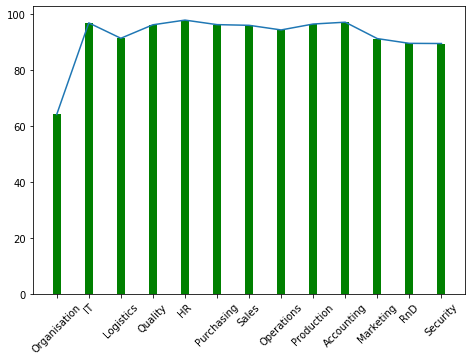

In [74]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dt_metrics['Department'], dt_metrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(dt_metrics['Department'], dt_metrics['Accuracy'])
ax.set_xticklabels(dt_metrics.Department, rotation=45)
plt.show()

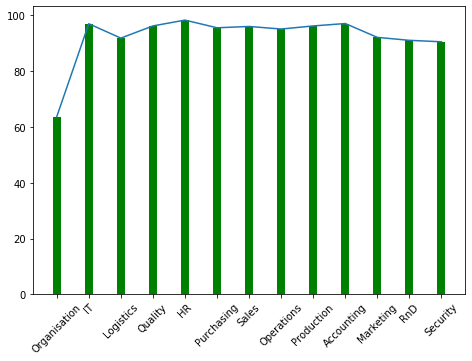

In [75]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dt_metrics['Department'], dt_metrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(dt_metrics['Department'], dt_metrics['F1-Score'])
ax.set_xticklabels(dt_metrics.Department, rotation=45)
plt.show()

#  Random Forest Trees

In [76]:
rf_metrics = pd.DataFrame()

def rf_tree(xtrain, xtest, ytrain, ytest):
    rf = RandomForestClassifier()
    rf.fit(xtrain, ytrain)
    pred =  rf.predict(xtest)
    acc = accuracy_score(ytest, pred)
    f1 = f1_score(ytest, pred)
    return acc, f1

In [77]:
acc, f1 = rf_tree(XTrain, XTest, YTrain, YTest)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
rf_metrics = rf_metrics.append([['Organisation', acc*100, f1*100]]) 
orgMetrics = orgMetrics.append([['Random Forest', acc*100, f1*100]]) 

Accuracy Score :  64.39
F1-Score :  63.96


In [78]:
acc, f1 = rf_tree(XTraindataIT, XTestdataIT, YTraindataIT, YTestdataIT)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
rf_metrics = rf_metrics.append([['IT', acc*100, f1*100]]) 
ITMetrics = ITMetrics.append([['Random Forest', acc*100, f1*100]]) 

Accuracy Score :  98.15
F1-Score :  98.19


In [79]:
acc, f1 = rf_tree(XTraindataLogistics, XTestdataLogistics, YTraindataLogistics, YTestdataLogistics)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
rf_metrics = rf_metrics.append([['Logistics', acc*100, f1*100]]) 
LogisticsMetrics = LogisticsMetrics.append([['Random Forest', acc*100, f1*100]]) 

Accuracy Score :  91.67
F1-Score :  92.07


In [80]:
acc, f1 = rf_tree(XTraindataQuality, XTestdataQuality, YTraindataQuality,YTestdataQuality)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
rf_metrics = rf_metrics.append([['Quality', acc*100, f1*100]]) 
QualityMetrics = QualityMetrics.append([['Random Forest', acc*100, f1*100]]) 

Accuracy Score :  100.0
F1-Score :  100.0


In [81]:
acc, f1 = rf_tree(XTraindataHR, XTestdataHR, YTraindataHR, YTestdataHR)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
rf_metrics = rf_metrics.append([['HR', acc*100, f1*100]]) 
HRMetrics = HRMetrics.append([['Random Forest', acc*100, f1*100]]) 

Accuracy Score :  100.0
F1-Score :  100.0


In [82]:
acc, f1 = rf_tree(XTraindataPurchasing, XTestdataPurchasing, YTraindataPurchasing, YTestdataPurchasing)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
rf_metrics = rf_metrics.append([['Purchasing', acc*100, f1*100]]) 
PurchasingMetrics = PurchasingMetrics.append([['Random Forest', acc*100, f1*100]]) 

Accuracy Score :  97.73
F1-Score :  97.25


In [83]:
acc, f1 = rf_tree(XTraindataSales, XTestdataSales, YTraindataSales, YTestdataSales)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
rf_metrics = rf_metrics.append([['Sales', acc*100, f1*100]]) 
SalesMetrics = SalesMetrics.append([['Random Forest', acc*100, f1*100]]) 

Accuracy Score :  97.58
F1-Score :  97.54


In [84]:
acc, f1 = rf_tree(XTraindataOperarions, XTestdataOperarions, YTraindataOperarions, YTestdataOperarions)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
rf_metrics = rf_metrics.append([['Operations', acc*100, f1*100]]) 
OperarionsMetrics = OperarionsMetrics.append([['Random Forest', acc*100, f1*100]]) 

Accuracy Score :  96.59
F1-Score :  96.97


In [85]:
acc, f1 = rf_tree(XTraindataProduction, XTestdataProduction, YTraindataProduction, YTestdataProduction)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
rf_metrics = rf_metrics.append([['Production', acc*100, f1*100]]) 
ProductionMetrics = ProductionMetrics.append([['Random Forest', acc*100, f1*100]]) 

Accuracy Score :  98.21
F1-Score :  98.04


In [86]:
acc, f1 = rf_tree(XTraindataAcconting, XTestdataAcconting, YTraindataAcconting, YTestdataAcconting)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
rf_metrics = rf_metrics.append([['Accounting', acc*100, f1*100]]) 
AccontingMetrics = AccontingMetrics.append([['Random Forest', acc*100, f1*100]]) 

Accuracy Score :  97.08
F1-Score :  97.01


In [87]:
acc, f1 = rf_tree(XTraindataMarketing, XTestdataMarketing, YTraindataMarketing, YTestdataMarketing)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
rf_metrics = rf_metrics.append([['Marketing', acc*100, f1*100]]) 
MarketingMetrics = MarketingMetrics.append([['Random Forest', acc*100, f1*100]]) 

Accuracy Score :  98.25
F1-Score :  98.31


In [88]:
acc, f1 = rf_tree(XTraindataRnD, XTestdataRnD, YTraindataRnD, YTestdataRnD)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
rf_metrics = rf_metrics.append([['RnD', acc*100, f1*100]]) 
RnDMetrics = RnDMetrics.append([['Random Forest', acc*100, f1*100]]) 

Accuracy Score :  91.28
F1-Score :  92.39


In [89]:
acc, f1 = rf_tree(XTraindataSecurity, XTestdataSecurity, YTraindataSecurity, YTestdataSecurity)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
rf_metrics = rf_metrics.append([['Security', acc*100, f1*100]]) 
SecurityMetrics = SecurityMetrics.append([['Random Forest', acc*100, f1*100]]) 

Accuracy Score :  100.0
F1-Score :  100.0


In [90]:
rf_metrics.columns = ['Department', 'Accuracy', 'F1-Score']
rf_metrics

,Department,Accuracy,F1-Score
0,Organisation,64.390244,63.960505
0,IT,98.153034,98.191214
0,Logistics,91.666667,92.073171
0,Quality,100.000000,100.000000
0,HR,100.000000,100.000000
0,Purchasing,97.727273,97.247706
0,Sales,97.580645,97.540984
0,Operations,96.590909,96.969697
0,Production,98.214286,98.039216
0,Accounting,97.080292,97.014925


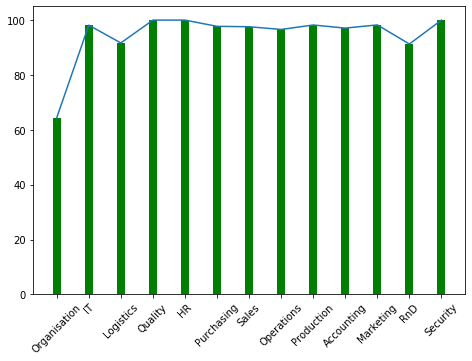

In [91]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(rf_metrics['Department'], rf_metrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(rf_metrics['Department'], rf_metrics['Accuracy'])
ax.set_xticklabels(rf_metrics.Department, rotation=45)
plt.show()

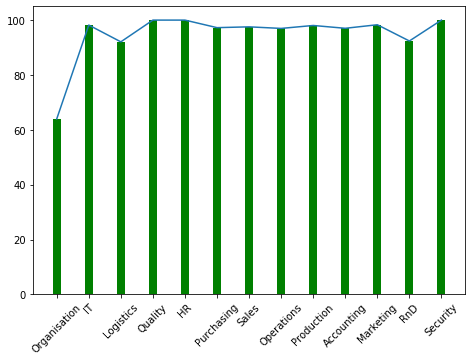

In [92]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(rf_metrics['Department'], rf_metrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(rf_metrics['Department'], rf_metrics['F1-Score'])
ax.set_xticklabels(rf_metrics.Department, rotation=45)
plt.show()

#  SVM

In [93]:
svm_metrics = pd.DataFrame()

def svm_model(xtrain, xtest, ytrain, ytest):
    svm = SVC()
    svm.fit(xtrain, ytrain)
    pred =  svm.predict(xtest)
    acc = accuracy_score(ytest, pred)
    f1 = f1_score(ytest, pred)
    return acc, f1

In [94]:
acc, f1 = svm_model(XTrain, XTest, YTrain, YTest)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
svm_metrics = svm_metrics.append([['Organisation', acc*100, f1*100]]) 
orgMetrics = orgMetrics.append([['SVM', acc*100, f1*100]]) 

Accuracy Score :  50.03
F1-Score :  65.72


In [95]:
acc, f1 = svm_model(XTraindataIT, XTestdataIT, YTraindataIT, YTestdataIT)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
svm_metrics = svm_metrics.append([['IT', acc*100, f1*100]]) 
ITMetrics = ITMetrics.append([['SVM', acc*100, f1*100]]) 

Accuracy Score :  55.41
F1-Score :  59.67


In [96]:
acc, f1 = svm_model(XTraindataLogistics, XTestdataLogistics, YTraindataLogistics, YTestdataLogistics)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
svm_metrics = svm_metrics.append([['Logistics', acc*100, f1*100]]) 
LogisticsMetrics = LogisticsMetrics.append([['SVM', acc*100, f1*100]]) 

Accuracy Score :  62.82
F1-Score :  63.98


In [97]:
acc, f1 = svm_model(XTraindataQuality, XTestdataQuality, YTraindataQuality,YTestdataQuality)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
svm_metrics = svm_metrics.append([['Quality', acc*100, f1*100]]) 
QualityMetrics = QualityMetrics.append([['SVM', acc*100, f1*100]]) 

Accuracy Score :  50.0
F1-Score :  53.57


In [98]:
acc, f1 = svm_model(XTraindataHR, XTestdataHR, YTraindataHR, YTestdataHR)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
svm_metrics = svm_metrics.append([['HR', acc*100, f1*100]]) 
HRMetrics = HRMetrics.append([['SVM', acc*100, f1*100]]) 

Accuracy Score :  72.83
F1-Score :  80.62


In [99]:
acc, f1 = svm_model(XTraindataPurchasing, XTestdataPurchasing, YTraindataPurchasing, YTestdataPurchasing)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
svm_metrics = svm_metrics.append([['Purchasing', acc*100, f1*100]]) 
PurchasingMetrics = PurchasingMetrics.append([['SVM', acc*100, f1*100]]) 

Accuracy Score :  55.3
F1-Score :  59.31


In [100]:
acc, f1 = svm_model(XTraindataSales, XTestdataSales, YTraindataSales, YTestdataSales)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
svm_metrics = svm_metrics.append([['Sales', acc*100, f1*100]]) 
SalesMetrics = SalesMetrics.append([['SVM', acc*100, f1*100]]) 

Accuracy Score :  59.27
F1-Score :  62.45


In [101]:
acc, f1 = svm_model(XTraindataProduction, XTestdataProduction, YTraindataProduction, YTestdataProduction)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
svm_metrics = svm_metrics.append([['Production', acc*100, f1*100]]) 
ProductionMetrics = ProductionMetrics.append([['ProductionMetrics', acc*100, f1*100]]) 

Accuracy Score :  51.79
F1-Score :  55.74


In [102]:
acc, f1 = svm_model(XTraindataOperarions, XTestdataOperarions, YTraindataOperarions, YTestdataOperarions)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
svm_metrics = svm_metrics.append([['Operations', acc*100, f1*100]]) 
OperarionsMetrics = OperarionsMetrics.append([['SVM', acc*100, f1*100]]) 

Accuracy Score :  54.55
F1-Score :  43.66


In [103]:
acc, f1 = svm_model(XTraindataAcconting, XTestdataAcconting, YTraindataAcconting, YTestdataAcconting)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
svm_metrics = svm_metrics.append([['Accounting', acc*100, f1*100]]) 
AccontingMetrics = AccontingMetrics.append([['SVM', acc*100, f1*100]]) 

Accuracy Score :  54.74
F1-Score :  52.31


In [104]:
acc, f1 = svm_model(XTraindataMarketing, XTestdataMarketing, YTraindataMarketing, YTestdataMarketing)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
svm_metrics = svm_metrics.append([['Marketing', acc*100, f1*100]]) 
MarketingMetrics = MarketingMetrics.append([['SVM', acc*100, f1*100]]) 

Accuracy Score :  59.65
F1-Score :  68.49


In [105]:
acc, f1 = svm_model(XTraindataRnD, XTestdataRnD, YTraindataRnD, YTestdataRnD)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
svm_metrics = svm_metrics.append([['RnD', acc*100, f1*100]]) 
RnDMetrics = RnDMetrics.append([['SVM', acc*100, f1*100]]) 

Accuracy Score :  58.72
F1-Score :  59.89


In [106]:
acc, f1 = svm_model(XTraindataSecurity, XTestdataSecurity, YTraindataSecurity, YTestdataSecurity)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
svm_metrics = svm_metrics.append([['Security', acc*100, f1*100]]) 
SecurityMetrics = SecurityMetrics.append([['SVM', acc*100, f1*100]]) 

Accuracy Score :  60.53
F1-Score :  66.67


In [107]:
svm_metrics.columns = ['Department', 'Accuracy', 'F1-Score']
svm_metrics.info

<bound method DataFrame.info of      Department   Accuracy   F1-Score
0  Organisation  50.027100  65.724907
0            IT  55.408971  59.665871
0     Logistics  62.820513  63.975155
0       Quality  50.000000  53.571429
0            HR  72.826087  80.620155
0    Purchasing  55.303030  59.310345
0         Sales  59.274194  62.453532
0    Production  51.785714  55.737705
0    Operations  54.545455  43.661972
0    Accounting  54.744526  52.307692
0     Marketing  59.649123  68.493151
0           RnD  58.720930  59.887006
0      Security  60.526316  66.666667>

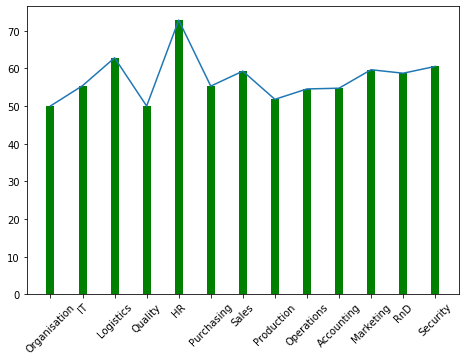

In [108]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(svm_metrics['Department'], svm_metrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(svm_metrics['Department'], svm_metrics['Accuracy'])
ax.set_xticklabels(svm_metrics.Department, rotation=45)
plt.show()

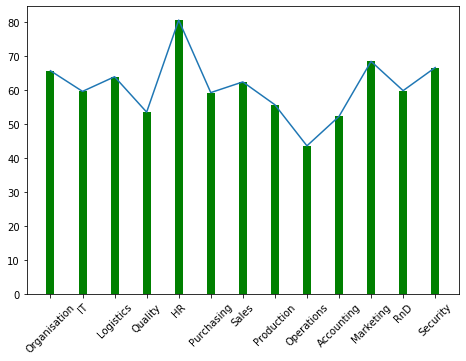

In [109]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(svm_metrics['Department'], svm_metrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(svm_metrics['Department'], svm_metrics['F1-Score'])
ax.set_xticklabels(svm_metrics.Department, rotation=45)
plt.show()

#  Neural Network

In [110]:
nn_metrics = pd.DataFrame()

def neural_network(xtrain, xtest, ytrain, ytest):
    nn = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=600,activation = 'tanh',solver='adam',random_state=1)
    nn.fit(xtrain, ytrain)
    pred =  nn.predict(xtest)
    acc = accuracy_score(ytest, pred)
    f1 = f1_score(ytest, pred)
    return acc, f1

In [111]:
acc, f1 = neural_network(XTrain, XTest, YTrain, YTest)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
nn_metrics = nn_metrics.append([['Organisation', acc*100, f1*100]]) 
orgMetrics = orgMetrics.append([['Neural Network', acc*100, f1*100]]) 

Accuracy Score :  54.25
F1-Score :  62.62


In [112]:
acc, f1 = neural_network(XTraindataIT, XTestdataIT, YTraindataIT, YTestdataIT)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
nn_metrics = nn_metrics.append([['IT', acc*100, f1*100]]) 
ITMetrics = ITMetrics.append([['Neural Network', acc*100, f1*100]]) 

Accuracy Score :  77.84
F1-Score :  81.9


In [113]:
acc, f1 = neural_network(XTraindataLogistics, XTestdataLogistics, YTraindataLogistics, YTestdataLogistics)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
nn_metrics = nn_metrics.append([['Logistics', acc*100, f1*100]]) 
LogisticsMetrics = LogisticsMetrics.append([['Neural Network', acc*100, f1*100]]) 

Accuracy Score :  85.26
F1-Score :  86.39


In [114]:
acc, f1 = neural_network(XTraindataQuality, XTestdataQuality, YTraindataQuality,YTestdataQuality)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
nn_metrics = nn_metrics.append([['Quality', acc*100, f1*100]]) 
QualityMetrics = QualityMetrics.append([['Neural Network', acc*100, f1*100]]) 

Accuracy Score :  98.08
F1-Score :  98.04


In [115]:
acc, f1 = neural_network(XTraindataHR, XTestdataHR, YTraindataHR, YTestdataHR)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
nn_metrics = nn_metrics.append([['HR', acc*100, f1*100]]) 
HRMetrics = HRMetrics.append([['Neural Network', acc*100, f1*100]]) 

Accuracy Score :  98.91
F1-Score :  99.12


In [116]:
acc, f1 = neural_network(XTraindataPurchasing, XTestdataPurchasing, YTraindataPurchasing, YTestdataPurchasing)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
nn_metrics = nn_metrics.append([['Purchasing', acc*100, f1*100]]) 
PurchasingMetrics = PurchasingMetrics.append([['Neural Network', acc*100, f1*100]]) 

Accuracy Score :  89.39
F1-Score :  87.04


In [117]:
acc, f1 = neural_network(XTraindataSales, XTestdataSales, YTraindataSales, YTestdataSales)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
nn_metrics = nn_metrics.append([['Sales', acc*100, f1*100]]) 
SalesMetrics = SalesMetrics.append([['Neural Network', acc*100, f1*100]]) 

Accuracy Score :  73.39
F1-Score :  65.26


In [118]:
acc, f1 = neural_network(XTraindataOperarions, XTestdataOperarions, YTraindataOperarions, YTestdataOperarions)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
nn_metrics = nn_metrics.append([['Operations', acc*100, f1*100]]) 
OperarionsMetrics = OperarionsMetrics.append([['Neural Network', acc*100, f1*100]]) 

Accuracy Score :  84.66
F1-Score :  86.15


In [119]:
acc, f1 = neural_network(XTraindataProduction, XTestdataProduction, YTraindataProduction, YTestdataProduction)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
nn_metrics = nn_metrics.append([['Production', acc*100, f1*100]]) 
ProductionMetrics = ProductionMetrics.append([['Neural Network', acc*100, f1*100]]) 

Accuracy Score :  100.0
F1-Score :  100.0


In [120]:
acc, f1 = neural_network(XTraindataAcconting, XTestdataAcconting, YTraindataAcconting, YTestdataAcconting)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
nn_metrics = nn_metrics.append([['Accounting', acc*100, f1*100]]) 
AccontingMetrics = AccontingMetrics.append([['Neural Network', acc*100, f1*100]]) 

Accuracy Score :  94.89
F1-Score :  94.31


In [121]:
acc, f1 = neural_network(XTraindataMarketing, XTestdataMarketing, YTraindataMarketing, YTestdataMarketing)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
nn_metrics = nn_metrics.append([['Marketing', acc*100, f1*100]]) 
MarketingMetrics = MarketingMetrics.append([['Neural Network', acc*100, f1*100]]) 

Accuracy Score :  94.74
F1-Score :  94.74


In [122]:
acc, f1 = neural_network(XTraindataRnD, XTestdataRnD, YTraindataRnD, YTestdataRnD)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
nn_metrics = nn_metrics.append([['RnD', acc*100, f1*100]]) 
RnDMetrics = RnDMetrics.append([['Neural Network', acc*100, f1*100]]) 

Accuracy Score :  73.26
F1-Score :  75.79


In [123]:
acc, f1 = neural_network(XTraindataSecurity, XTestdataSecurity, YTraindataSecurity, YTestdataSecurity)
print('Accuracy Score : ', np.round(acc*100, 2))
print('F1-Score : ', np.round(f1*100, 2))
nn_metrics = nn_metrics.append([['Security', acc*100, f1*100]]) 
SecurityMetrics = SecurityMetrics.append([['Neural Network', acc*100, f1*100]]) 

Accuracy Score :  94.74
F1-Score :  95.0


In [124]:
nn_metrics.columns = ['Department', 'Accuracy', 'F1-Score']
nn_metrics

,Department,Accuracy,F1-Score
0,Organisation,54.254743,62.621789
0,IT,77.836412,81.896552
0,Logistics,85.256410,86.390533
0,Quality,98.076923,98.039216
0,HR,98.913043,99.115044
0,Purchasing,89.393939,87.037037
0,Sales,73.387097,65.263158
0,Operations,84.659091,86.153846
0,Production,100.000000,100.000000
0,Accounting,94.890511,94.308943


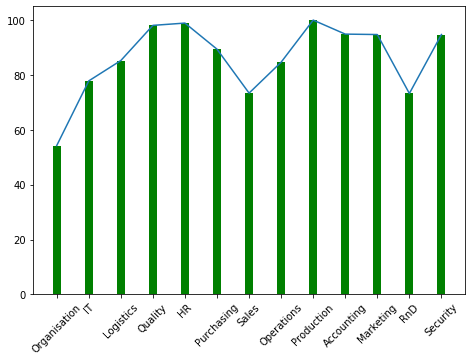

In [125]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(nn_metrics['Department'], nn_metrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(nn_metrics['Department'], nn_metrics['Accuracy'])
ax.set_xticklabels(nn_metrics.Department, rotation=45)
plt.show()

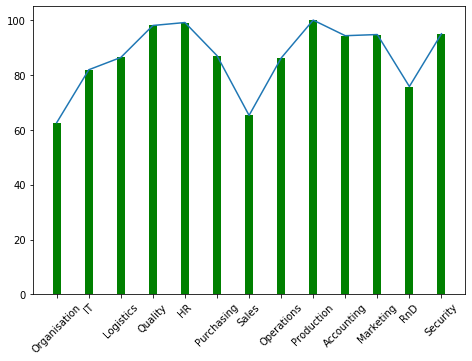

In [126]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(nn_metrics['Department'], nn_metrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(nn_metrics['Department'], nn_metrics['F1-Score'])
ax.set_xticklabels(nn_metrics.Department, rotation=45)
plt.show()

#  Department Wise Comparison

## Organisation

In [127]:
orgMetrics.columns = ['Model', 'Accuracy', 'F1-Score']
orgMetrics

,Model,Accuracy,F1-Score
0,Decision Tree,64.173442,63.621354
0,Random Forest,64.390244,63.960505
0,SVM,50.027100,65.724907
0,Neural Network,54.254743,62.621789


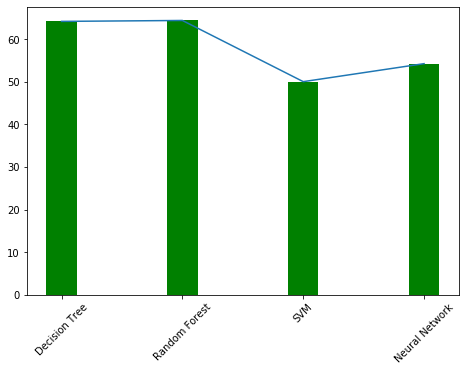

In [128]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(orgMetrics['Model'], orgMetrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(orgMetrics['Model'], orgMetrics['Accuracy'])
ax.set_xticklabels(orgMetrics.Model, rotation=45)
plt.show()

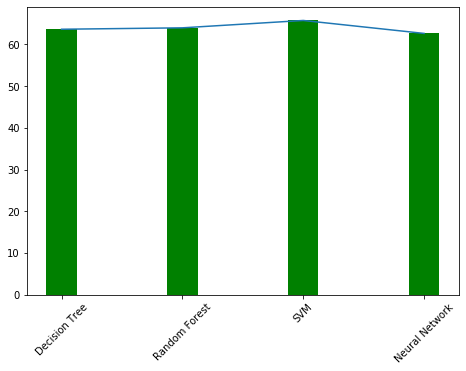

In [129]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(orgMetrics['Model'], orgMetrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(orgMetrics['Model'], orgMetrics['F1-Score'])
ax.set_xticklabels(orgMetrics.Model, rotation=45)
plt.show()

## IT

In [130]:
ITMetrics.columns = ['Model', 'Accuracy', 'F1-Score']
ITMetrics

,Model,Accuracy,F1-Score
0,Decision Tree,96.833773,96.938776
0,Random Forest,98.153034,98.191214
0,SVM,55.408971,59.665871
0,Neural Network,77.836412,81.896552


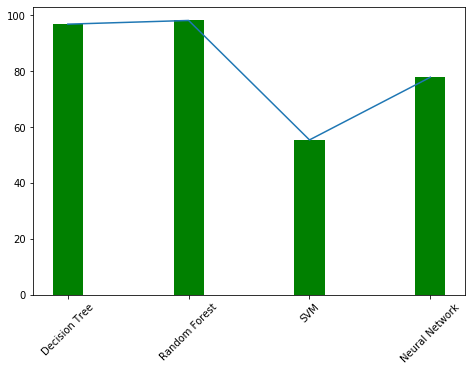

In [131]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ITMetrics['Model'], ITMetrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(ITMetrics['Model'], ITMetrics['Accuracy'])
ax.set_xticklabels(ITMetrics.Model, rotation=45)
plt.show()

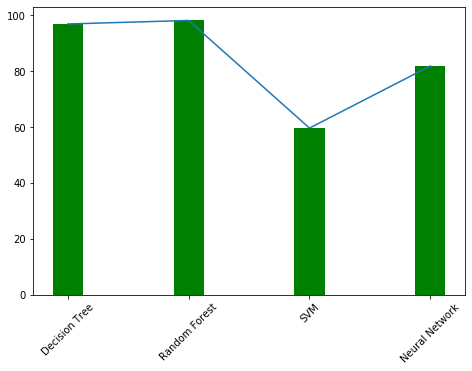

In [132]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ITMetrics['Model'], ITMetrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(ITMetrics['Model'], ITMetrics['F1-Score'])
ax.set_xticklabels(ITMetrics.Model, rotation=45)
plt.show()

## Logistics

In [133]:
LogisticsMetrics.columns = ['Model', 'Accuracy', 'F1-Score']
LogisticsMetrics

,Model,Accuracy,F1-Score
0,Decision Tree,91.346154,91.793313
0,Random Forest,91.666667,92.073171
0,SVM,62.820513,63.975155
0,Neural Network,85.256410,86.390533


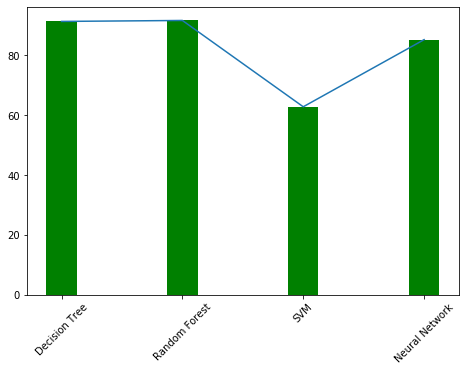

In [134]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(LogisticsMetrics['Model'], LogisticsMetrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(LogisticsMetrics['Model'], LogisticsMetrics['Accuracy'])
ax.set_xticklabels(LogisticsMetrics.Model, rotation=45)
plt.show()

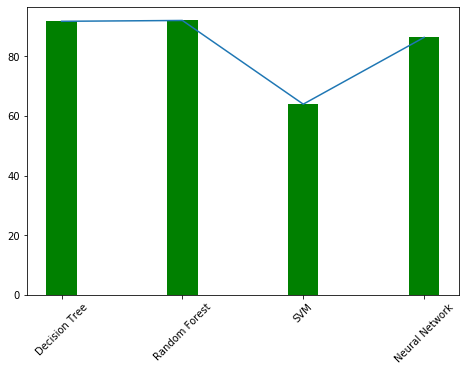

In [135]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(LogisticsMetrics['Model'], LogisticsMetrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(LogisticsMetrics['Model'], LogisticsMetrics['F1-Score'])
ax.set_xticklabels(LogisticsMetrics.Model, rotation=45)
plt.show()

##  Quality

In [136]:
QualityMetrics.columns = ['Model', 'Accuracy', 'F1-Score']
QualityMetrics

,Model,Accuracy,F1-Score
0,Decision Tree,96.153846,96.153846
0,Random Forest,100.000000,100.000000
0,SVM,50.000000,53.571429
0,Neural Network,98.076923,98.039216


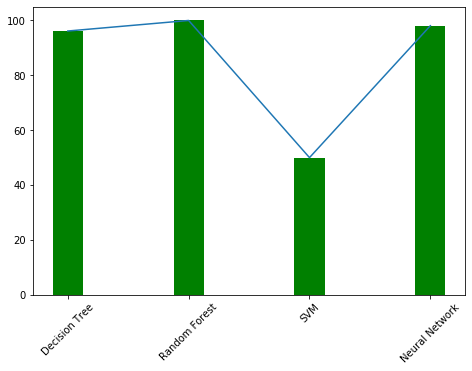

In [137]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(QualityMetrics['Model'], QualityMetrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(QualityMetrics['Model'], QualityMetrics['Accuracy'])
ax.set_xticklabels(QualityMetrics.Model, rotation=45)
plt.show()

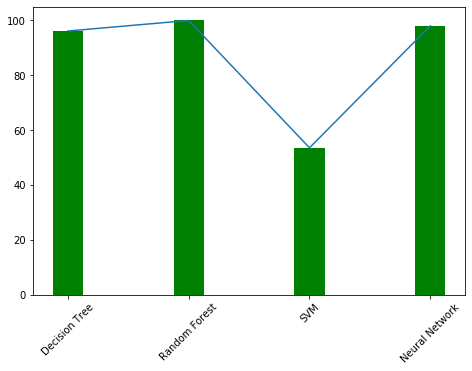

In [138]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(QualityMetrics['Model'], QualityMetrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(QualityMetrics['Model'], QualityMetrics['F1-Score'])
ax.set_xticklabels(QualityMetrics.Model, rotation=45)
plt.show()

## Human Resources 

In [139]:
HRMetrics.columns = ['Model', 'Accuracy', 'F1-Score']
HRMetrics

,Model,Accuracy,F1-Score
0,Decision Tree,97.826087,98.245614
0,Random Forest,100.000000,100.000000
0,SVM,72.826087,80.620155
0,Neural Network,98.913043,99.115044


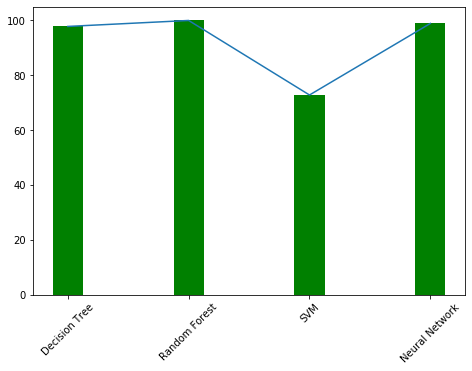

In [140]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(HRMetrics['Model'], HRMetrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(HRMetrics['Model'], HRMetrics['Accuracy'])
ax.set_xticklabels(HRMetrics.Model, rotation=45)
plt.show()

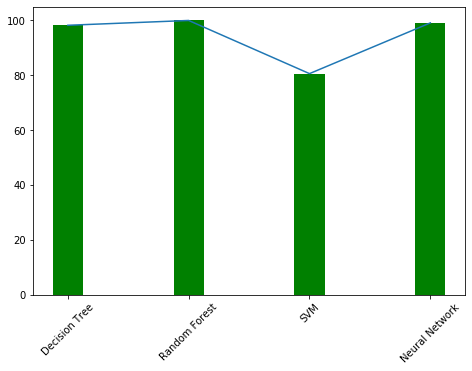

In [141]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(HRMetrics['Model'], HRMetrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(HRMetrics['Model'], HRMetrics['F1-Score'])
ax.set_xticklabels(HRMetrics.Model, rotation=45)
plt.show()

## Purchasing 

In [142]:
PurchasingMetrics.columns = ['Model', 'Accuracy', 'F1-Score']
PurchasingMetrics

,Model,Accuracy,F1-Score
0,Decision Tree,96.212121,95.495495
0,Random Forest,97.727273,97.247706
0,SVM,55.303030,59.310345
0,Neural Network,89.393939,87.037037


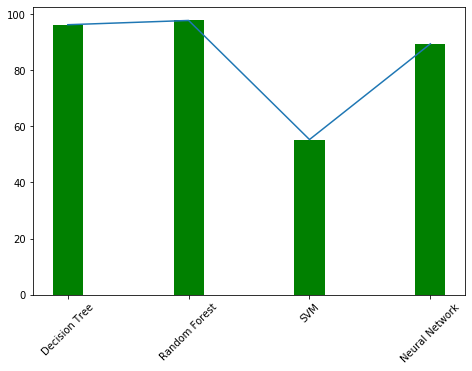

In [143]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(PurchasingMetrics['Model'], PurchasingMetrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(PurchasingMetrics['Model'], PurchasingMetrics['Accuracy'])
ax.set_xticklabels(PurchasingMetrics.Model, rotation=45)
plt.show()

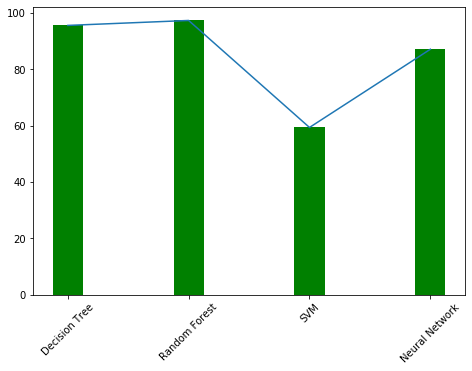

In [144]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(PurchasingMetrics['Model'], PurchasingMetrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(PurchasingMetrics['Model'], PurchasingMetrics['F1-Score'])
ax.set_xticklabels(PurchasingMetrics.Model, rotation=45)
plt.show()

## Sales 

In [145]:
SalesMetrics.columns = ['Model', 'Accuracy', 'F1-Score']
SalesMetrics

,Model,Accuracy,F1-Score
0,Decision Tree,95.967742,95.967742
0,Random Forest,97.580645,97.540984
0,SVM,59.274194,62.453532
0,Neural Network,73.387097,65.263158


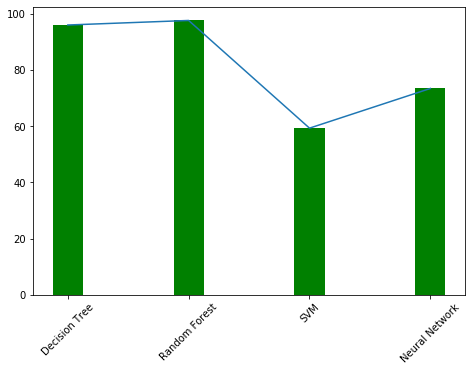

In [146]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(SalesMetrics['Model'], SalesMetrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(SalesMetrics['Model'], SalesMetrics['Accuracy'])
ax.set_xticklabels(SalesMetrics.Model, rotation=45)
plt.show()

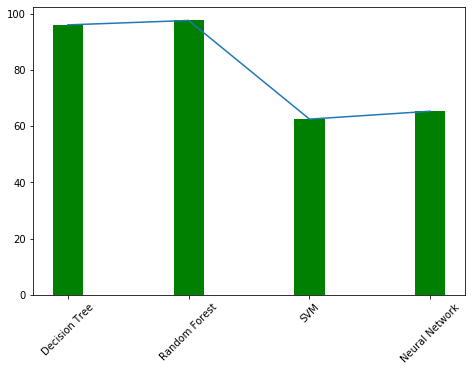

In [147]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(SalesMetrics['Model'], SalesMetrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(SalesMetrics['Model'], SalesMetrics['F1-Score'])
ax.set_xticklabels(SalesMetrics.Model, rotation=45)
plt.show()

## Operations

In [148]:
OperarionsMetrics.columns = ['Model', 'Accuracy', 'F1-Score']
OperarionsMetrics

,Model,Accuracy,F1-Score
0,Decision Tree,94.318182,95.049505
0,Random Forest,96.590909,96.969697
0,SVM,54.545455,43.661972
0,Neural Network,84.659091,86.153846


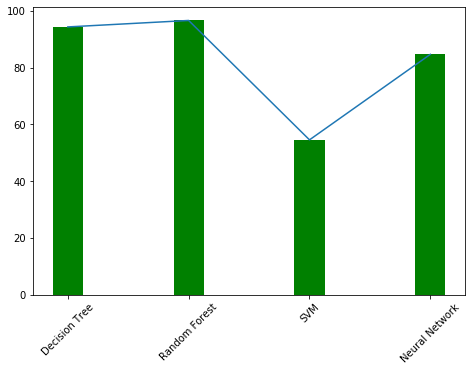

In [149]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(OperarionsMetrics['Model'], OperarionsMetrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(OperarionsMetrics['Model'], OperarionsMetrics['Accuracy'])
ax.set_xticklabels(OperarionsMetrics.Model, rotation=45)
plt.show()

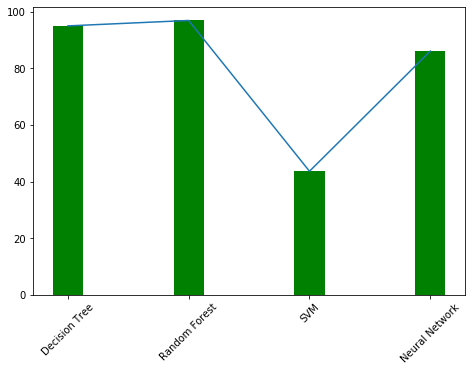

In [150]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(OperarionsMetrics['Model'], OperarionsMetrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(OperarionsMetrics['Model'], OperarionsMetrics['F1-Score'])
ax.set_xticklabels(OperarionsMetrics.Model, rotation=45)
plt.show()

## Production 

In [151]:
ProductionMetrics.columns = ['Model', 'Accuracy', 'F1-Score']
ProductionMetrics

,Model,Accuracy,F1-Score
0,Decision Tree,96.428571,96.153846
0,Random Forest,98.214286,98.039216
0,ProductionMetrics,51.785714,55.737705
0,Neural Network,100.000000,100.000000


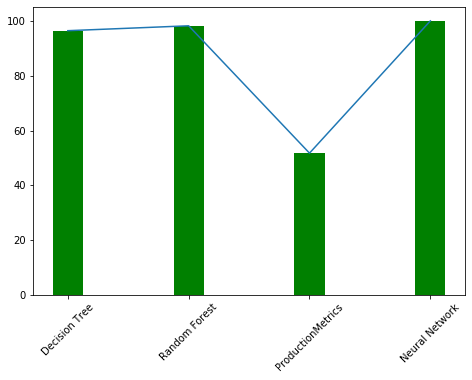

In [152]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ProductionMetrics['Model'], ProductionMetrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(ProductionMetrics['Model'], ProductionMetrics['Accuracy'])
ax.set_xticklabels(ProductionMetrics.Model, rotation=45)
plt.show()

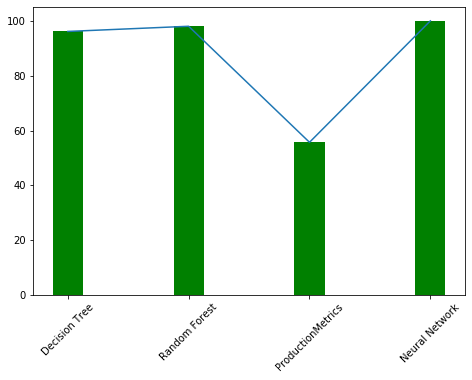

In [153]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ProductionMetrics['Model'], ProductionMetrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(ProductionMetrics['Model'], ProductionMetrics['F1-Score'])
ax.set_xticklabels(ProductionMetrics.Model, rotation=45)
plt.show()

## Accounting 

In [154]:
AccontingMetrics.columns = ['Model', 'Accuracy', 'F1-Score']
AccontingMetrics

,Model,Accuracy,F1-Score
0,Decision Tree,97.080292,97.014925
0,Random Forest,97.080292,97.014925
0,SVM,54.744526,52.307692
0,Neural Network,94.890511,94.308943


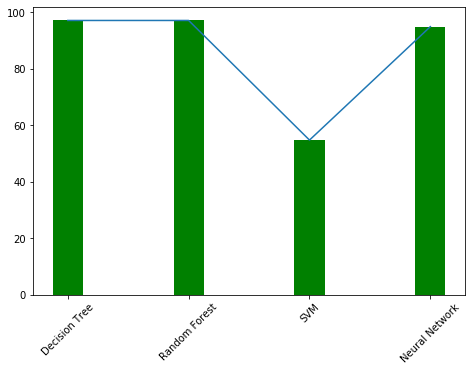

In [155]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(AccontingMetrics['Model'], AccontingMetrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(AccontingMetrics['Model'], AccontingMetrics['Accuracy'])
ax.set_xticklabels(AccontingMetrics.Model, rotation=45)
plt.show()

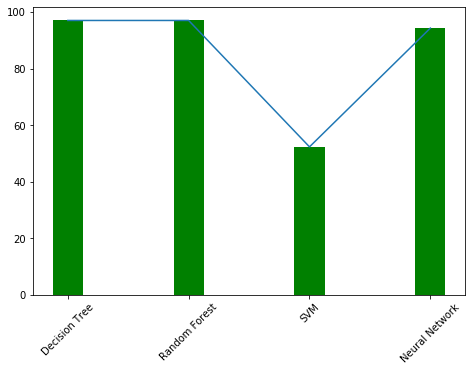

In [156]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(AccontingMetrics['Model'], AccontingMetrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(AccontingMetrics['Model'], AccontingMetrics['F1-Score'])
ax.set_xticklabels(AccontingMetrics.Model, rotation=45)
plt.show()

## Marketing 

In [157]:
MarketingMetrics.columns = ['Model', 'Accuracy', 'F1-Score']
MarketingMetrics

,Model,Accuracy,F1-Score
0,Decision Tree,91.228070,92.063492
0,Random Forest,98.245614,98.305085
0,SVM,59.649123,68.493151
0,Neural Network,94.736842,94.736842


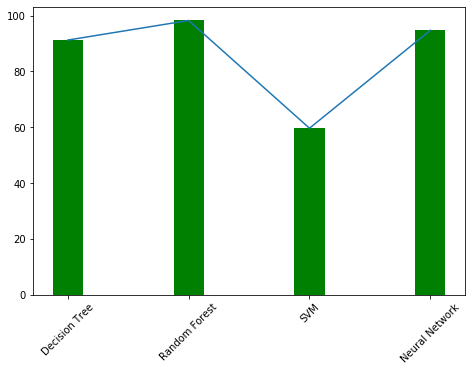

In [158]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(MarketingMetrics['Model'], MarketingMetrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(MarketingMetrics['Model'], MarketingMetrics['Accuracy'])
ax.set_xticklabels(MarketingMetrics.Model, rotation=45)
plt.show()

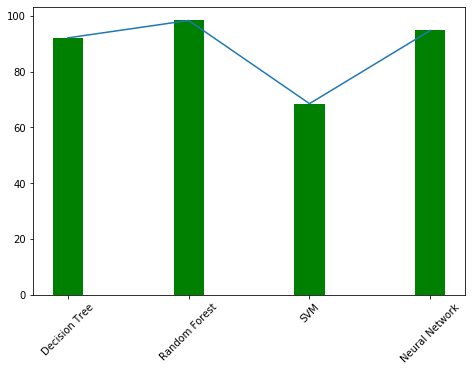

In [159]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(MarketingMetrics['Model'], MarketingMetrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(MarketingMetrics['Model'], MarketingMetrics['F1-Score'])
ax.set_xticklabels(MarketingMetrics.Model, rotation=45)
plt.show()

## Research and Development

In [160]:
RnDMetrics.columns = ['Model', 'Accuracy', 'F1-Score']
RnDMetrics

,Model,Accuracy,F1-Score
0,Decision Tree,89.534884,91.000000
0,Random Forest,91.279070,92.385787
0,SVM,58.720930,59.887006
0,Neural Network,73.255814,75.789474


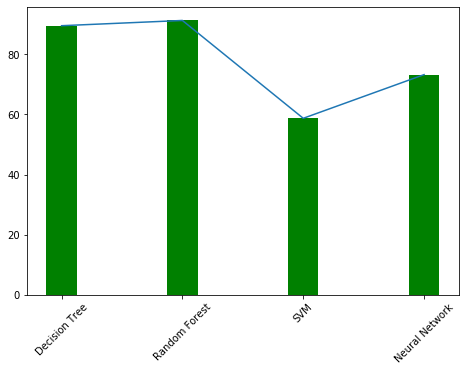

In [161]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(RnDMetrics['Model'], RnDMetrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(RnDMetrics['Model'], RnDMetrics['Accuracy'])
ax.set_xticklabels(RnDMetrics.Model, rotation=45)
plt.show()

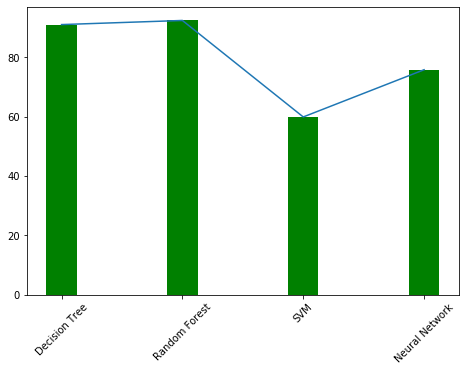

In [162]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(RnDMetrics['Model'], RnDMetrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(RnDMetrics['Model'], RnDMetrics['F1-Score'])
ax.set_xticklabels(RnDMetrics.Model, rotation=45)
plt.show()

## Security 

In [163]:
SecurityMetrics.columns = ['Model', 'Accuracy', 'F1-Score']
SecurityMetrics

,Model,Accuracy,F1-Score
0,Decision Tree,89.473684,90.476190
0,Random Forest,100.000000,100.000000
0,SVM,60.526316,66.666667
0,Neural Network,94.736842,95.000000


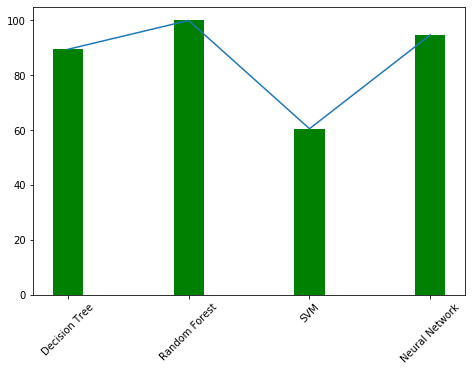

In [164]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(SecurityMetrics['Model'], SecurityMetrics['Accuracy'], color = 'g', width = 0.25)
ax.plot(SecurityMetrics['Model'], SecurityMetrics['Accuracy'])
ax.set_xticklabels(SecurityMetrics.Model, rotation=45)
plt.show()

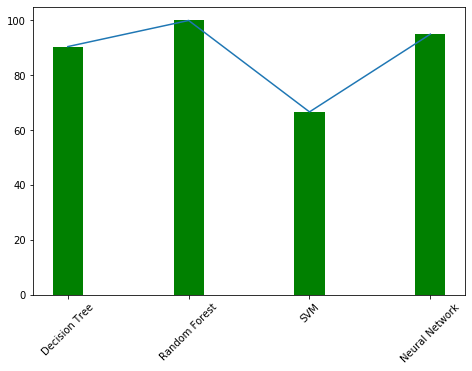

In [165]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(SecurityMetrics['Model'], SecurityMetrics['F1-Score'], color = 'g', width = 0.25)
ax.plot(SecurityMetrics['Model'], SecurityMetrics['F1-Score'])
ax.set_xticklabels(SecurityMetrics.Model, rotation=45)
plt.show()